In [23]:
import sympy as sp

def sub_pow_exprs(expr):
    # replace each square root expression with sqrt(abs()) to avoid negative inside sqrt
    if (isinstance(expr, sp.Number)): return expr
    new_args = []
    for i in range(len(expr.args)):
        new_args.append(sub_pow_exprs(expr.args[i]))
    if expr.args:
        expr = expr.func(*tuple(new_args))
        if expr.func == sp.core.power.Pow and abs(expr.exp) == 0.5:
            expr = sp.sqrt(sp.Abs(expr.base, evaluate=False))
    return expr

x = sp.symbols("x")
y = sp.symbols("y")
expr = 0.5*sp.sqrt(1+sp.sqrt(sp.log(x/y))) * sp.sqrt(x+y) * sp.Abs(y*x)
print(sub_pow_exprs(expr))
print(expr.func)
print(expr.args)
new_expr = expr.func(*tuple(expr.args))
new_expr = sp.sqrt(sp.Abs(expr.base))
print(expr.base)
print(new_expr)
expr = x/y
print(expr.args)
print(expr.args[1].args)

0.5*Abs(x*y)*sqrt(Abs(x + y))*sqrt(Abs(sqrt(Abs(log(x/y))) + 1))
<class 'sympy.core.mul.Mul'>
(0.500000000000000, sqrt(sqrt(log(x/y)) + 1), sqrt(x + y), Abs(x*y))


AttributeError: 'Mul' object has no attribute 'base'

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory


In [28]:
model = pyo.ConcreteModel()
model.nVars = pyo.Param(initialize=4)
model.N = pyo.RangeSet(model.nVars)
model.x = pyo.Var(model.N, domain=pyo.NonNegativeReals)
model.obj = pyo.Objective(expr=1/model.x[2], sense=pyo.minimize)
model.scaling_factor = pyo.Suffix(direction=pyo.Suffix.EXPORT)
print(model.obj.polynomial_degree())
for i in range(1, 5):
    model.x[i] = 1
    model.scaling_factor[model.x[i]] = None
model.scaling_factor[model.obj] = 1
sub_expr = model.x[3]
for i in range(1, 256):
    sub_expr = abs(sub_expr + 5 + model.x[4]*model.x[1])
model.constr = pyo.Constraint(expr=model.x[1] == model.x[2])
opt = SolverFactory("ipopt")
model.display()
scaled_model = pyo.TransformationFactory("core.scale_model").create_using(model)
scaled_model.display()
#results = opt.solve(model)
#model.display()

None
Model unknown

  Variables:
    x : Size=4, Index=N
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :     1 :  None : False : False : NonNegativeReals
          2 :     0 :     1 :  None : False : False : NonNegativeReals
          3 :     0 :     1 :  None : False : False : NonNegativeReals
          4 :     0 :     1 :  None : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :   1.0

  Constraints:
    constr : Size=1
        Key  : Lower : Body : Upper
        None :   0.0 :    0 :   0.0
Model unknown

  Variables:
    scaled_x : Size=4, Index=N
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :     2 :  None : False : False : NonNegativeReals
          2 :     0 :     2 :  None : False : False : NonNegativeReals
          3 :     0 :     2 :  None : False : False : NonNegativeReals
          4 :     0 :     2 :  None : Fa

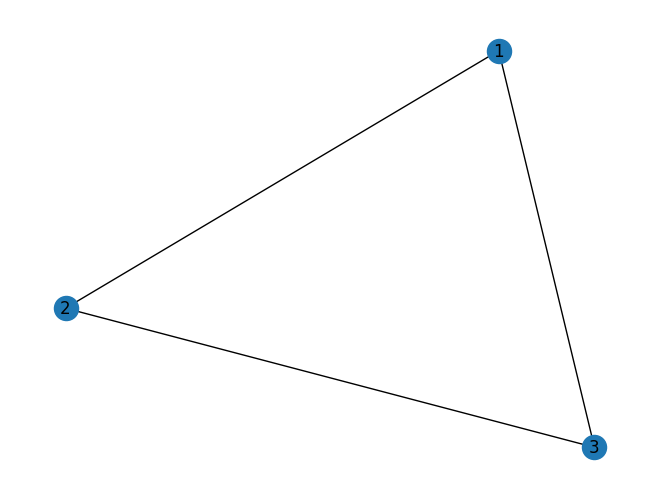

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [13]:
import sympy as sp

class expr:
    def __init__(self, sp_expr):
        self.sp_expr = sp_expr
    def __mul__(self, other):
        if not isinstance(other, expr):
            return expr((self.sp_expr * other).expand())
        return expr((self.sp_expr * other.sp_expr).expand())
    
    def __add__(self, other):
        if not isinstance(other, expr):
            return expr(self.sp_expr + other)
        return expr(self.sp_expr + other.sp_expr)
    
    def __floordiv__(self, other):
        if not isinstance(other, expr):
            return expr(self.sp_expr // other)
        return expr(self.sp_expr // other.sp_expr)
    
    def __truediv__(self, other):
        if not isinstance(other, expr):
            return expr(self.sp_expr / other)
        return expr(self.sp_expr / other.sp_expr)
    
a = sp.symbols("a")
b = sp.symbols("b")
c = sp.symbols("c")
# non-expanded expression
print(a*(b+c)/2)

# expr class automatically expands expressions upon multiply
d = expr(a)*(b+c) / 2
print(d.sp_expr)

a*(b + c)/2
a*b/2 + a*c/2


In [32]:
import sympy as sp

x = sp.symbols("x")
y = sp.symbols("y")
z = sp.symbols("z")
w = sp.symbols("w")

exprs_to_sub_s = []
symbol_idx = 0

expr = x * y * z * w - 1
print(expr.args[0])
print(isinstance(expr.args[0], sp.Number))
args = list(expr.args)
print(args)
print(expr.func == sp.Mul)
if (expr.func == sp.Mul and len(expr.args) > 2):
    first_arg = expr.args[0]
    for i in range(1, len(expr.args)-1):
        sub_expr = expr.func(*((first_arg, expr.args[i])))
        sub_symbol = sp.symbols(f"sub_var_{symbol_idx}")
        symbol_idx += 1
        exprs_to_sub_s.append([sub_expr, sub_symbol])
        first_arg = sub_symbol
    expr = expr.func(*((first_arg, expr.args[-1])))
new_symbol = sp.symbols(f"sub_var_{symbol_idx}")
symbol_idx += 1
exprs_to_sub_s.append([expr, new_symbol])

print(exprs_to_sub_s)

subs = {x: 1, y:2}

new_expr = expr.func(*(tuple(args)))
print(new_expr)



-1
True
[-1, w*x*y*z]
False
[[w*x*y*z - 1, sub_var_0]]
w*x*y*z - 1


In [4]:
import sympy as sp

m = {}

v = sp.symbols("v")
d = sp.symbols("d")
m[v*d] = 1
print(m[v*d])
print(type(v*d))

1
<class 'sympy.core.mul.Mul'>


In [ ]:
import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import jax.tree_util as jtu
import sympy

import sympy2jax

def assert_equal(x, y):
    x_leaves, x_tree = jtu.tree_flatten(x)
    y_leaves, y_tree = jtu.tree_flatten(y)
    assert x_tree == y_tree
    for xi, yi in zip(x_leaves, y_leaves):
        assert type(xi) is type(yi)
        if isinstance(xi, jnp.ndarray):
            assert xi.shape == yi.shape
            assert xi.dtype == yi.dtype
            assert jnp.all(xi == yi)
        else:
            assert xi == yi

def assert_sympy_allclose(x, y):
    assert isinstance(x, sympy.Expr)
    assert isinstance(y, sympy.Expr)
    assert x.func is y.func
    if isinstance(x, sympy.Float):
        assert abs(float(x) - float(y)) < 1e-5
    elif isinstance(x, sympy.Integer):
        assert x == y
    elif isinstance(x, sympy.Rational):
        assert x.numerator == y.numerator  # pyright: ignore
        assert x.denominator == y.denominator  # pyright: ignore
    elif isinstance(x, sympy.Symbol):
        assert x.name == y.name  # pyright: ignore
    else:
        assert len(x.args) == len(y.args)
        for xarg, yarg in zip(x.args, y.args):
            assert_sympy_allclose(xarg, yarg)

x_sym = sympy.symbols("x_sym")
y = 2.1 * x_sym**2
mod = sympy2jax.SymbolicModule(y)
x = jnp.array(1.1)

grad_m = eqx.filter_grad(lambda m, z: m(x_sym=z))(mod, x)
#print(grad_m)
grad_z = eqx.filter_grad(lambda z, m: m(x_sym=z))(x, mod)

true_grad_m = eqx.filter(
    sympy2jax.SymbolicModule(1.21 * x_sym**2), eqx.is_inexact_array
)
true_grad_z = jnp.array(4.2 * x)
print(grad_z)

assert_equal(grad_m, true_grad_m)
assert_equal(grad_z, true_grad_z)

mod2 = eqx.apply_updates(mod, grad_m)
expr = mod2.sympy()

assert_sympy_allclose(expr, 3.31 * x_sym**2)

R = sympy.symbols("R")
C = sympy.symbols("C")
edp = R*C + 2*C**2
mod = sympy2jax.SymbolicModule(edp)
R_i = jnp.array(2.0)
A_i = jnp.array(2.0)
C_i = jnp.array(3.0)
grad_C = eqx.filter_grad(lambda z, y, m: m(C=z, R=y))(C_i, R_i, mod)
print(grad_C)
grad_R = eqx.filter_grad(lambda a, z, y, m: m(A=z, R=a, C=y))(R_i, A_i, C_i, mod)
print(grad_R)

In [ ]:
import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import jax.tree_util as jtu
import sympy
import hw_symbols
import sympy2jax
from codesign import Codesign
import copy


def rotate_arr(args_arr):
    next_val = args_arr[0]
    for i in range(len(args_arr))[::-1]:    
        tmp = next_val
        next_val = args_arr[(i)%len(args_arr)]
        args_arr[(i)%len(args_arr)] = tmp
    return args_arr

def get_grad(grad_var, args_arr, jmod):
    return eqx.filter_grad(lambda gvar, arr0, arr, a: a(grad_var = gvar,
                                                V_dd=arr0,
                                                f=arr[1],
                                                MemReadL=arr[2],
                                                MemWriteL=arr[3],
                                                MemReadPact=arr[4],
                                                MemWritePact=arr[5],
                                                MemPpass=arr[6],
                                                Reff_And=arr[7],
                                                Reff_Or=arr[8],
                                                Reff_Add=arr[9],
                                                Reff_Sub=arr[10],
                                                Reff_Mult=arr[11],
                                                Reff_FloorDiv=arr[12],
                                                Reff_Mod=arr[13],
                                                Reff_LShift=arr[14],
                                                Reff_RShift=arr[15],
                                                Reff_BitOr=arr[16],
                                                Reff_BitXor=arr[17],
                                                Reff_BitAnd=arr[18],
                                                Reff_Eq=arr[19],
                                                Reff_NotEq=arr[20],
                                                Reff_Lt=arr[21],
                                                Reff_LtE=arr[22],
                                                Reff_Gt=arr[23],
                                                Reff_GtE=arr[24],
                                                Reff_USub=arr[25],
                                                Reff_UAdd=arr[26],
                                                Reff_IsNot=arr[27],
                                                Reff_Not=arr[28],
                                                Reff_Invert=arr[29],
                                                Reff_Regs=arr[30],
                                                Ceff_And=arr[31],
                                                Ceff_Or=arr[32],
                                                Ceff_Add=arr[33],
                                                Ceff_Sub=arr[34],
                                                Ceff_Mult=arr[35],
                                                Ceff_FloorDiv=arr[36],
                                                Ceff_Mod=arr[37],
                                                Ceff_LShift=arr[38],
                                                Ceff_RShift=arr[39],
                                                Ceff_BitOr=arr[40],
                                                Ceff_BitXor=arr[41],
                                                Ceff_BitAnd=arr[42],
                                                Ceff_Eq=arr[43],
                                                Ceff_NotEq=arr[44],
                                                Ceff_Lt=arr[45],
                                                Ceff_LtE=arr[46],
                                                Ceff_Gt=arr[47],
                                                Ceff_GtE=arr[48],
                                                Ceff_USub=arr[49],
                                                Ceff_UAdd=arr[50],
                                                Ceff_IsNot=arr[51],
                                                Ceff_Not=arr[52],
                                                Ceff_Invert=arr[53],
                                                Ceff_Regs=arr[54]))(grad_var, args_arr[0], args_arr, jmod)

mod = Codesign("testme.py", "logs")
edp = 2*hw_symbols.symbol_table["Ceff_Add"] + 4*hw_symbols.symbol_table["Ceff_Regs"] + 3*hw_symbols.symbol_table["V_dd"]
#print(edp)
args_arr = []
starting_vals = []
for name in hw_symbols.symbol_table:
    args_arr.append(jnp.array(mod.tech_params[hw_symbols.symbol_table[name]]))
    starting_vals.append(mod.tech_params[hw_symbols.symbol_table[name]])
original_arr = copy.deepcopy(args_arr)

#print(args_arr)
grad_map = {}
grad_var = sympy.symbols("grad_var")
j = 0
for name in hw_symbols.symbol_table:
    m = {}
    i = 0
    for other_name in hw_symbols.symbol_table:
        m[hw_symbols.symbol_table[other_name]] = list(hw_symbols.symbol_table)[(i+j)%len(hw_symbols.symbol_table)]
        i += 1
    edp_cur = edp.subs({
        hw_symbols.symbol_table[name]: grad_var
    })
    print(edp_cur)
    jmod = sympy2jax.SymbolicModule(edp_cur)
    grad_map[name] = get_grad(args_arr[j], args_arr, jmod)
    print(name, grad_map[name])
    print(args_arr)
    j += 1
    #raise Exception()
raise Exception()

memory needed: 116 bytes
nvm memory needed: 0 bytes
memory needed: 116 bytes
nvm memory needed: 0 bytes
2*Ceff_Add + 4*Ceff_Regs + 3*grad_var
V_dd 3.0
[Array(1.1, dtype=float32, weak_type=True), Array(2.e+09, dtype=float32, weak_type=True), Array(2.e-09, dtype=float32, weak_type=True), Array(2.e-09, dtype=float32, weak_type=True), Array(1.e-07, dtype=float32, weak_type=True), Array(1.e-07, dtype=float32, weak_type=True), Array(8.448e-08, dtype=float32, weak_type=True), Array(2010.4232, dtype=float32, weak_type=True), Array(2010.4232, dtype=float32, weak_type=True), Array(2004.8353, dtype=float32, weak_type=True), Array(2004.8353, dtype=float32, weak_type=True), Array(46.949585, dtype=float32, weak_type=True), Array(46.949585, dtype=float32, weak_type=True), Array(2004.8353, dtype=float32, weak_type=True), Array(1014.97614, dtype=float32, weak_type=True), Array(1014.97614, dtype=float32, weak_type=True), Array(2010.4232, dtype=float32, weak_type=True), Array(2010.4232, dtype=float32, we

Exception: 

In [ ]:
import pandas as pd

# For now, only reading from asap7 data
# Will update in the future with more
f = open("tech_node_data/asap7data.txt", "r")
fl = f.readlines()
d = []
name = []
technode = []
for i in range(len(fl)):
    if fl[i].startswith("cell") and len(fl[i+2])>1:
        name.append(fl[i][fl[i].find("(")+1:fl[i].find("_")])
        technode.append(7)
        n = name[-1]
        d.append([float(fl[i+1].split(" ")[1])*1e-6, float(fl[i+5].split(" ")[1])*1e-15, float(fl[i+6].split(" ")[1])])
ind = pd.MultiIndex.from_arrays([technode, name], names=("tech node", "standard cell"))
df = pd.DataFrame(data=d, index=ind, columns=["area", "R_eff", "C_eff"])
df.to_csv("params/std_cell_data.csv")

In [15]:

import yaml
import os
import sys
from src import sim_util
import glob
import datetime

%load_ext autoreload
%autoreload 2

def get_latest_log_dir():
    log_dirs = glob.glob("../logs/*-*-*_*-*-*")
    log_dirs = sorted(log_dirs, key=lambda x: datetime.datetime.strptime(x.split("/")[-1], "%Y-%m-%d_%H-%M-%S"))
    return log_dirs[-1]

log_dir = get_latest_log_dir()

print(log_dir)

log_file = open(f"{log_dir}/log.txt", 'r')
log_lines = log_file.readlines()
for line in log_lines:
    if line.startswith("INFO:src.hardwareModel:BUFFER") or line.startswith("INFO:src.hardwareModel:MEMORY"):
        print(line)

rcs = yaml.load(open(f"logs/{log_date}/rcs_0.yaml", 'r'), loader=yaml.Loader)
tech_params = sim_util.generate_init_params_from_rcs_as_symbols(rcs)
cacti_exprs = yaml.load(open(f"logs/{log_date}/cacti_exprs_0.yaml", 'r'), loader=yaml.Loader)
for i in range(len(cacti_exprs)):
    cacti_exprs[i] = cacti_exprs[i].xreplace(tech_params)
print(cacti_exprs)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


IndexError: list index out of range